In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv('titanic_train.csv')

In [4]:
train.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


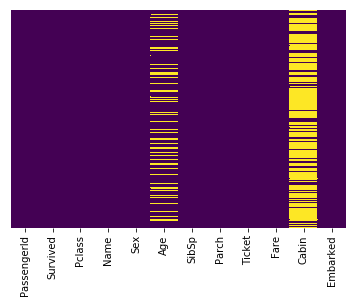

In [5]:
#So i can clearly see how much data is missing from each coloumn
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
sns.set_style('whitegrid')

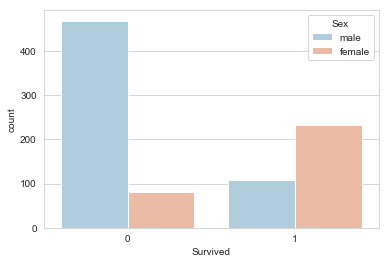

In [7]:
#0 is died/ 1 is survived. Hue is just a preference
sns.countplot(x='Survived',data=train,hue='Sex',palette='RdBu_r')

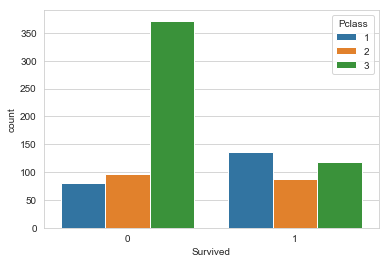

In [8]:
#I also wanted to be sure which Passenger class suffered the most fatalities
sns.countplot(x='Survived',data=train,hue='Pclass',)

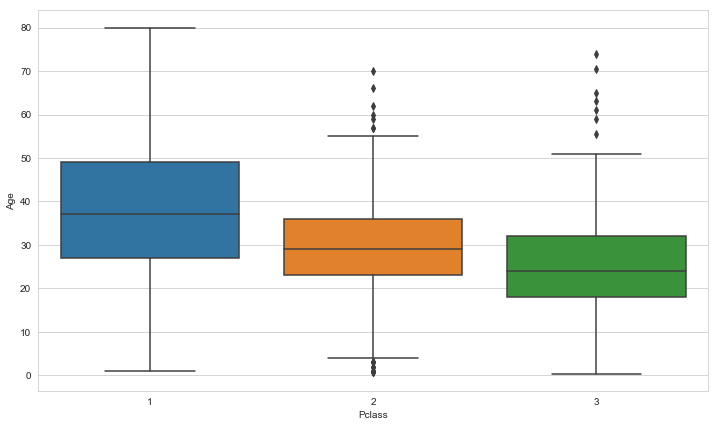

In [9]:
#As the average ages in line 5 were only missing a few. I am using this graph and then the following method to fill in those gaps
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [10]:
# Defining the average age and what i want returned for each person depending on their average age
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]    
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        
        elif Pclass == 2:
            return 29
        
        else:
            return 24
    else: 
        return Age

In [11]:
#applying the fuction below. This code did not work for a bit as i forgot to typr 'isnull' -_-!
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

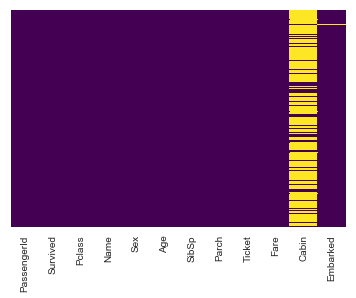

In [12]:
#Confirming that all of the ages have been fuifilled 
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
train.drop('Cabin',axis=1,inplace=True)

In [14]:
train.dropna(inplace=True)

In [15]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [16]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [17]:
train = pd.concat([train,sex,embark],axis=1)

In [18]:
train.drop(['PassengerId'],axis=1,inplace=True)

In [26]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
#im dropping survived as that is what i want to test the model on
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),
                                                   train['Survived'], test_size=0.30,
                                                   random_state=101)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
predictions = logmodel.predict(X_test)

In [24]:
from sklearn.metrics import classification_report

In [25]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       163
          1       0.82      0.65      0.73       104

avg / total       0.81      0.81      0.80       267

